In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x = [1, 2, 3, 4]
y = np.array(x)**2

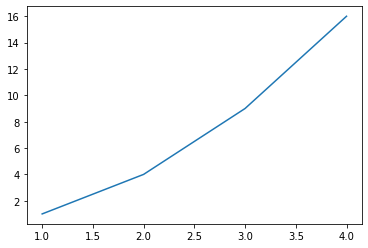

In [6]:
plt.plot(x,y)

In [14]:
x = np.linspace(0, 2, 100)

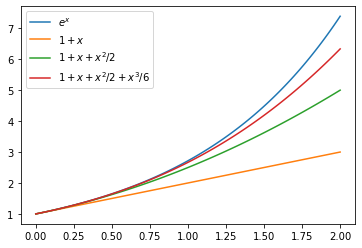

In [17]:
y = np.exp(x)
plt.plot(x, y, label = '$e^x$')
plt.plot(x, 1+ x, label = '$1+x$')
plt.plot(x, 1+ x+  x**2/2, label = '$1+ x+  x^2/2$')
plt.plot(x, 1+ x+  x**2/2 + x**3/6, label = '$1+ x+  x^2/2 + x^3/6$')
plt.legend()

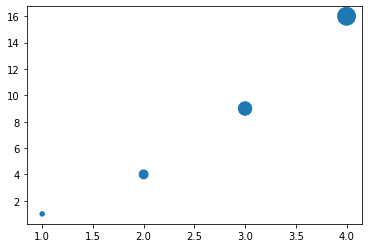

In [21]:
x = [1, 2, 3, 4]
y = np.array(x)**2
plt.scatter(x, y, 20*y )

###The Euler Method ###

You would usually have to solve the following differential equation through a variety of tricks like separation of variables., integrating factors, power series etc.

$$\frac{dy}{dx} = f(x, y)$$

But on a computer, there is a general method that deals with replacing the derivative with our approximation of a slope.

$$ \frac{y(x+ \Delta x)- y(x)}{\Delta x} = f(x, y(x)) $$

That results in the following Euler method for time stepping.

$$y(x+ \Delta x)  = y(x) + \Delta x f(x, y(x))$$

Let us see how good it is for the following ode and compare it to its true solution.

$$ \frac{dy}{dx} = sin(x) $$

$$y(x) = A - cos(x)$$

In [23]:
def euler_step(x, y, delta_x, derivative):
    return y + delta_x*derivative(x,y)

In [27]:
def my_sin(x, y):
    return np.sin(x)

In [49]:
y_0 = 0
y_array = []
y_array += [y_0]

x_space = np.linspace(0, 2*np.pi, 200)
delta_x = x_space[1]-x_space[0]
for x in x_space:
    y_old = y_array[-1]
    y_new = euler_step(x, y_old, delta_x, my_sin)
    y_array += [y_new]

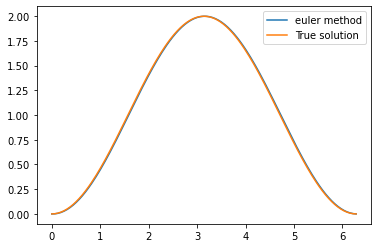

In [50]:
plt.plot(x_space, y_array[:-1], label = 'euler method')
plt.plot(x_space, 1 - np.cos(x_space), label = 'True solution')
plt.legend()

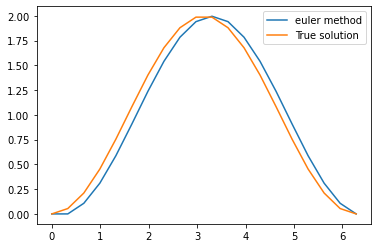

In [51]:
y_0 = 0
y_array = []
y_array += [y_0]

x_space = np.linspace(0, 2*np.pi, 20)
delta_x = x_space[1]-x_space[0]
for x in x_space:
    y_old = y_array[-1]
    y_new = euler_step(x, y_old, delta_x, my_sin)
    y_array += [y_new]
    
plt.plot(x_space, y_array[:-1], label = 'Euler method')
plt.plot(x_space, 1 - np.cos(x_space), label = 'True solution')
plt.legend()

$$ \frac{dy}{dx} = e^y sin(x) $$

In [55]:
def rhs(x,y):
    return np.exp(y)*np.sin(x)

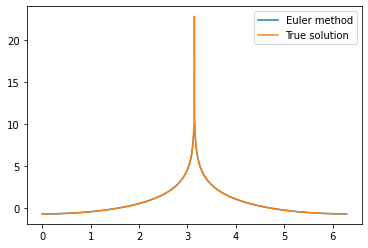

In [61]:
y_0 = -np.log(2)
y_array = []
y_array += [y_0]

x_space = np.linspace(0, 2*np.pi, 200000)
delta_x = x_space[1]-x_space[0]
for x in x_space:
    y_old = y_array[-1]
    y_new = euler_step(x, y_old, delta_x, rhs)
    y_array += [y_new]
    
plt.plot(x_space, y_array[:-1], label = 'Euler method')
plt.plot(x_space, - np.log(1+np.cos(x_space)), label = 'True solution')
plt.legend()

$$ \frac{dy}{dx} = -\frac{x}{y}  $$

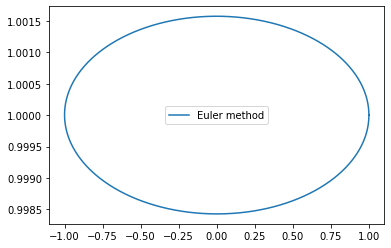

In [68]:
def circle(x,y):
    return -x/y

y_0 = 1
y_array = []
y_array += [y_0]

theta_space = np.linspace(0, 2*np.pi, 2000)
x_space = np.cos(theta_space)
delta_x = x_space[1]-x_space[0]
for x in x_space:
    y_old = y_array[-1]
    y_new = euler_step(x, y_old, delta_x, circle)
    y_array += [y_new]
    
plt.plot(x_space, y_array[:-1], label = 'Euler method')
#plt.plot(x_space, - np.log(1+np.cos(x_space)), label = 'True solution')
plt.legend()

$$\Delta x$$ controls accuracy but a concept called stability is also important. So, a backward euler scheme is sometimes used.

$$y(x+ \Delta x)  = y(x) + \Delta x f(x+\Delta x, y(x+\Delta x))$$